# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [4]:
sinasc_raw.select_dtypes('number').columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'CONSULTAS',
       'HORANASC', 'APGAR1', 'APGAR5', 'PESO', 'IDANOMAL', 'NUMEROLOTE',
       'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU',
       'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC',
       'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART',
       'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC',
       'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON',
       'PARIDADE', 'KOTELCHUCK', 'CONTADOR', 'munResLat', 'munResLon',
       'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
sinasc_raw['faixaLat'] = sinasc_raw['munResLat'].apply(lambda x: 'Igual ou maior que -10,5°' if x >= -10.5 else 'Menor que 10,5°')
sinasc_lat = sinasc_raw.loc[:, ('faixaLat', 'CONSPRENAT', 'QTDPARTNOR', 'QTDPARTCES')]
sinasc_lat.groupby('faixaLat').agg(['sum',
                                   'mean',
                                   'min',
                                   'max',
                                   'median',
                                   'std',
                                   'var'])

CONSPRENAT                                        \
                                 sum      mean  min   max median       std   
faixaLat                                                                     
Igual ou maior que -10,5°   105365.0  7.931125  0.0  99.0    8.0  5.863665   
Menor que 10,5°             110072.0  8.590650  0.0  99.0    8.0  4.243615   

                                     QTDPARTNOR                 ...         \
                                 var        sum      mean  min  ... median   
faixaLat                                                        ...          
Igual ou maior que -10,5°  34.382564     8771.0  0.711759  0.0  ...    0.0   
Menor que 10,5°            18.008270     5801.0  0.452284  0.0  ...    0.0   

                                              QTDPARTCES                       \
                                std       var        sum      mean  min   max   
faixaLat                                                                        
Igual ou maior que -10,5°  1.279042  1.635949     6041.0  0.487335  0.0  12.0   
Menor que 10,5°            1.123393  1.262012     7095.0  0.552527  0.0  12.0   

                                                      
                          median       std       var  
faixaLat                                              
Igual ou maior que -10,5°    0.0  0.737899  0.544495  
Menor que 10,5°              0.0  0.753022  0.567042  

[2 rows x 21 columns]

Achei estranho a mediana para as quantidades de parto ser 0. Vou fazer algumas verificações

In [6]:
sinasc_raw['QTDPARTNOR'].value_counts()

QTDPARTNOR
0.0     17251
1.0      4378
2.0      1958
3.0       828
4.0       382
5.0       168
6.0        90
7.0        44
8.0        17
10.0       14
9.0        11
12.0        2
40.0        2
14.0        2
30.0        1
41.0        1
Name: count, dtype: int64

In [7]:
sinasc_raw['QTDPARTCES'].value_counts()

QTDPARTCES
0.0     15282
1.0      7252
2.0      2309
3.0       345
4.0        43
10.0        3
12.0        2
5.0         1
Name: count, dtype: int64

A maior parte dos dados é composta por valores iguais a zero, em ambas as distribuições. Vou verificar o valor com maior chance de aparecer, que é a moda

In [8]:
# Calcular a moda
moda_partos_normais = sinasc_raw['QTDPARTNOR'].mode()[0]
moda_partos_cesarea = sinasc_raw['QTDPARTCES'].mode()[0]

print(f"Moda dos partos normais: {moda_partos_normais}")
print(f"Moda dos partos cesárea: {moda_partos_cesarea}")

Moda dos partos normais: 0.0
Moda dos partos cesárea: 0.0


A mediana 0, assim como a moda, são condizentes com a distribuição

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [9]:
sinasc_raw['faixaArea'] = sinasc_raw['munResArea'].apply(lambda x: 'Igual ou maior que 3000 km2' if x >= 3000 else 'Menor que 3000km2')
sinasc_area = sinasc_raw.loc[:, ('faixaArea', 'CONSPRENAT', 'QTDPARTNOR')]
sinasc_area.groupby('faixaArea').agg(['sum',
                                   'mean',
                                   'min',
                                   'max',
                                   'median',
                                   'std',
                                   'var'])

CONSPRENAT                                        \
                                   sum      mean  min   max median       std   
faixaArea                                                                      
Igual ou maior que 3000 km2   170662.0  8.143825  0.0  99.0    8.0  5.325530   
Menor que 3000km2              44775.0  8.707701  0.0  99.0    8.0  4.291319   

                                       QTDPARTNOR                              \
                                   var        sum      mean  min   max median   
faixaArea                                                                       
Igual ou maior que 3000 km2  28.361275    12659.0  0.632982  0.0  41.0    0.0   
Menor que 3000km2            18.415420     1913.0  0.371456  0.0  10.0    0.0   

                                                 
                                  std       var  
faixaArea                                        
Igual ou maior que 3000 km2  1.278932  1.635668  
Menor que 3000km2            0.856402  0.733425

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
faixa_alt = pd.cut(sinasc_raw['munResAlt'], 4)
sinasc_area = sinasc_raw.loc[:, ('CONSPRENAT', 'QTDPARTCES')]
sinasc_area.groupby(faixa_alt, observed=False).agg(['sum',
                                   'mean',
                                   'min',
                                   'max',
                                   'median',
                                   'std',
                                   'var']
                                   )

CONSPRENAT                                                   \
                      sum      mean  min   max median       std        var   
munResAlt                                                                    
(84.49, 212.5]   165864.0  8.124614  0.0  99.0    8.0  5.306686  28.160918   
(212.5, 340.0]    31023.0  8.292702  0.0  99.0    8.0  3.336498  11.132217   
(340.0, 467.5]     3261.0  9.008287  1.0  18.0    9.0  2.981464   8.889128   
(467.5, 595.0]    15289.0  9.682711  0.0  99.0    9.0  6.502999  42.288997   

               QTDPARTCES                                                  
                      sum      mean  min   max median       std       var  
munResAlt                                                                  
(84.49, 212.5]     9633.0  0.493342  0.0  12.0    0.0  0.741340  0.549584  
(212.5, 340.0]     2363.0  0.628457  0.0   5.0    0.0  0.758030  0.574609  
(340.0, 467.5]      202.0  0.553425  0.0   3.0    0.0  0.737921  0.544528  
(467.5, 595.0]      938.0  0.591798  0.0   4.0    0.0  0.754152  0.568746

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [11]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

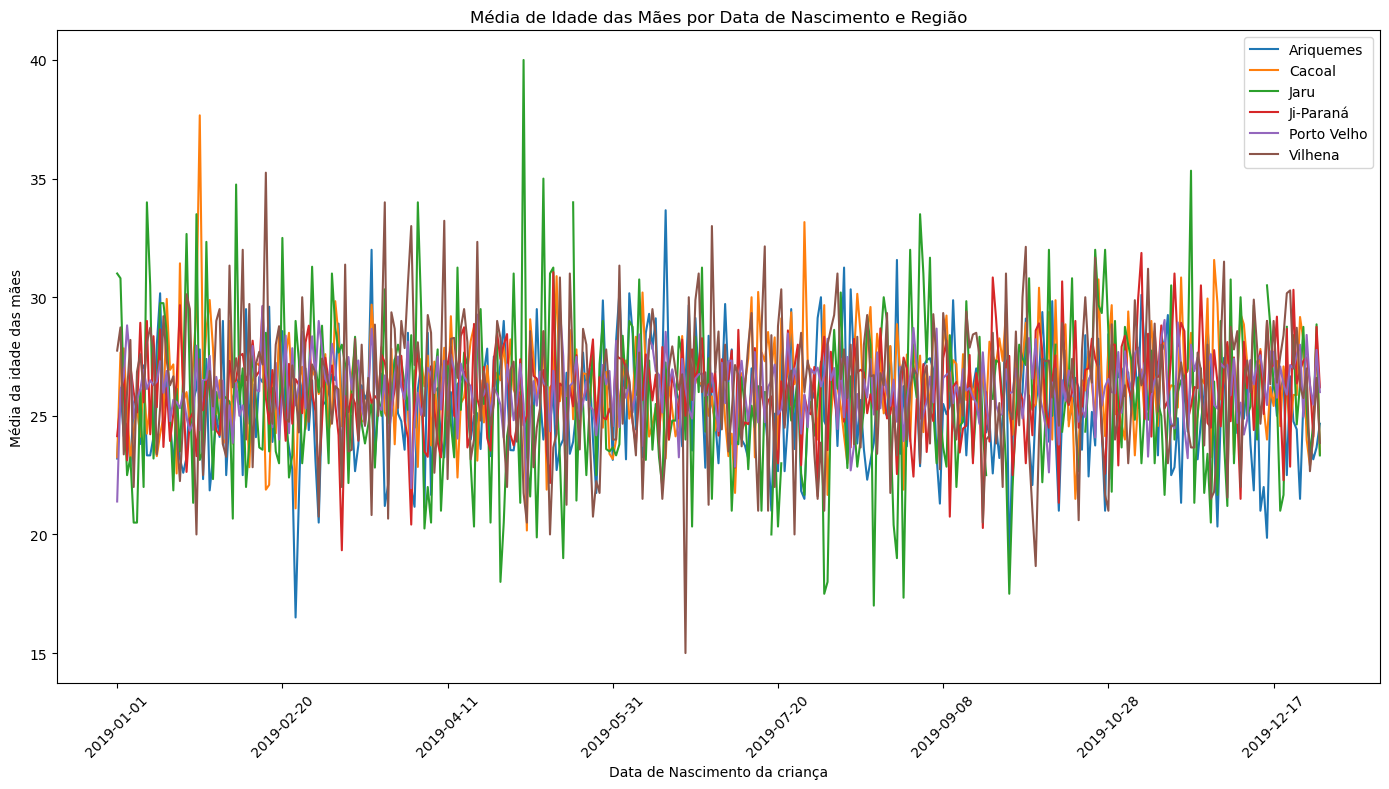

In [12]:
sinasc_media_idademae = sinasc_raw.loc[:, ('munResNome','DTNASC','IDADEMAE')]
sinasc_media_idademae['regiao'] = sinasc_media_idademae['munResNome'].map(imediatas)
agrupamento = sinasc_media_idademae.groupby(['regiao', 'DTNASC'])['IDADEMAE'].mean()

fig, ax = plt.subplots(figsize=(14, 8))

# Abre o multindex e facilita a plotagem
agrupamento.unstack(level=0).plot(ax=ax)

# Configurações adicionais
plt.xlabel('Data de Nascimento da criança')
plt.ylabel('Média da idade das mães')
plt.title('Média de Idade das Mães por Data de Nascimento e Região')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


Coleta dos dados diretamente do site, usando as bibliotecas requests e BeautifulSoup

In [13]:
import requests
from bs4 import BeautifulSoup

# site de onde serão extraídos os dados
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M' 

# criação do objeto response, para acessar os dados
response = requests.get(url)

if response.status_code == 200: # verifica conexão com o site

    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Encontra todas as tabelas na página
    tabelas = soup.find_all('table')
    dados_tabela = []
    # Itera sobre as tabelas encontradas
    for tabela in tabelas:
        # Extrair os dados da tabela e armazená-los em uma estrutura de dados
        linhas = tabela.find_all('tr')
        for linha in linhas:
            celulas = linha.find_all(['th', 'td'])
            dados_linha = [celula.get_text(strip=True) for celula in celulas]
            dados_tabela.append(dados_linha)        
else:
    print('Erro ao acessar a página:', response.status_code)


Formatação dos dados e criação das faixas

In [14]:
# criação de um df para receber os dados extraídos
tabela_idh = pd.DataFrame(dados_tabela)

# seleção das linhas que contém informações significativas, formatando os cabeçalhos das colunas diretamente
tabela_idh = tabela_idh.iloc[5:59, 1:3].rename(columns={1: 'Município', 2: 'IDH'}).dropna()

# verifiquei que há uma pequena divergência entre o sinasc_raw e a tabela extraída,
# então vou corrigir
tabela_idh['Município'] = tabela_idh['Município'].str.replace("d'", "D'")

#setando o nome do município como índice, para criação do mapping
tabela_idh = tabela_idh.set_index('Município')

# todos os dados foram extraídos como str, então preciso ajustar
tabela_idh['IDH'] = tabela_idh['IDH'].astype(float)

map_dict_idh =  tabela_idh['IDH'].to_dict()

#criação das faixas
sinasc_raw['idh_mun'] = sinasc_raw['munResNome'].map(map_dict_idh)
sinasc_raw['faixaIDH'] = sinasc_raw['idh_mun'].apply(lambda x: 'IDH Alto' if x >= 0.7 else 'IDH médio' if x >= 0.6 else 'IDH baixo')

#resultado
sinasc_raw['faixaIDH']

0        IDH médio
1        IDH médio
2        IDH médio
3        IDH baixo
4        IDH médio
           ...    
27023     IDH Alto
27024    IDH médio
27025     IDH Alto
27026     IDH Alto
27027    IDH médio
Name: faixaIDH, Length: 27028, dtype: object

Finalmente, o agrupamento

In [15]:
sinasc_idh = sinasc_raw.loc[:, ('faixaIDH','IDADEMAE', 'CONSPRENAT')]
sinasc_idh.groupby('faixaIDH').agg([('média', 'mean')])

,IDADEMAE,CONSPRENAT
,média,média
faixaIDH,,
IDH Alto,26.280332,8.239692
IDH baixo,25.326218,8.152381
IDH médio,25.884855,8.307307


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


Vou usar a mesma abordagem do exercício anterior

In [16]:
import requests
from bs4 import BeautifulSoup

# site de onde serão extraídos os dados
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM' 

# criação do objeto response, para acessar os dados
response = requests.get(url)

if response.status_code == 200: # verifica conexão com o site

    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Encontra todas as tabelas na página
    tabelas = soup.find_all('table')
    dados_tabela = []
    # Itera sobre as tabelas encontradas
    for tabela in tabelas:
        # Extrair os dados da tabela e armazená-los em uma estrutura de dados
        linhas = tabela.find_all('tr')
        for linha in linhas:
            celulas = linha.find_all(['th', 'td'])
            dados_linha = [celula.get_text(strip=True) for celula in celulas]
            dados_tabela.append(dados_linha)        
else:
    print('Erro ao acessar a página:', response.status_code)


Criação das faixas, como no anterior

In [17]:
# Criação do DataFrame que recebe os dados e início da limpeza
tabela_ifdm = pd.DataFrame(dados_tabela).dropna(how='any')

# Slicing e renomeação
tabela_ifdm = tabela_ifdm.loc[1:, 1:].rename(columns={1: 'Município', 2: 'IFDM'})

# Ajuste dos nomes dos municípios
tabela_ifdm['Município'] = tabela_ifdm['Município'].str.replace("d'", "D'")

# Definindo o índice como a coluna 'Município'
tabela_ifdm = tabela_ifdm.set_index('Município')

# Mudança do tipo de dados da coluna 'IFDM' para float
tabela_ifdm['IFDM'] = tabela_ifdm['IFDM'].astype(float)

# Criação do dicionário de mapeamento a partir da coluna 'IFDM'
map_dict_ifdm = tabela_ifdm['IFDM'].to_dict()

# Aplicação do mapeamento ao DataFrame original
sinasc_raw['ifdm_mun'] = sinasc_raw['munResNome'].map(map_dict_ifdm)

# Criação das faixas com base nos valores de IFDM
sinasc_raw['faixaIFDM'] = sinasc_raw['ifdm_mun'].apply(lambda x: 'Desenvolvimento moderado' if x >= 0.6 
                                                       else 'Desenvolvimento regular')

# Exibição dos resultados
sinasc_raw['faixaIFDM']


0        Desenvolvimento moderado
1        Desenvolvimento moderado
2        Desenvolvimento moderado
3         Desenvolvimento regular
4        Desenvolvimento moderado
                   ...           
27023    Desenvolvimento moderado
27024    Desenvolvimento moderado
27025    Desenvolvimento moderado
27026    Desenvolvimento moderado
27027     Desenvolvimento regular
Name: faixaIFDM, Length: 27028, dtype: object

Agregação

In [18]:
sinasc_ifdm = sinasc_raw.loc[:,('faixaIFDM', 'ESCMAEAGR1', 'QTDFILVIVO')]
escagr_mae = pd.cut(sinasc_raw['ESCMAEAGR1'], 4)
sinasc_ifdm.pivot_table(values='QTDFILVIVO',
                        index='faixaIFDM',
                        columns=escagr_mae,
                        aggfunc='mean',
                        dropna=True,
                        observed=False)

ESCMAEAGR1,"(-0.012, 3.0]","(3.0, 6.0]","(6.0, 9.0]","(9.0, 12.0]"
faixaIFDM,,,,
Desenvolvimento moderado,1.747323,0.937883,0.720542,1.084689
Desenvolvimento regular,1.932636,1.040855,0.812329,1.146544


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


Usarei a mesma abordagem

In [19]:
import requests
from bs4 import BeautifulSoup

# site de onde serão extraídos os dados
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB' 

# criação do objeto response, para acessar os dados
response = requests.get(url)

if response.status_code == 200: # verifica conexão com o site

    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Encontra todas as tabelas na página
    tabelas = soup.find_all('table')
    dados_tabela = []
    # Itera sobre as tabelas encontradas
    for tabela in tabelas:
        # Extrair os dados da tabela e armazená-los em uma estrutura de dados
        linhas = tabela.find_all('tr')
        for linha in linhas:
            celulas = linha.find_all(['th', 'td'])
            dados_linha = [celula.get_text(strip=True) for celula in celulas]
            dados_tabela.append(dados_linha)        
else:
    print('Erro ao acessar a página:', response.status_code)


Formatação dos dados e criação das faixas

In [20]:
# criação do df que recebe os dados e começo da limpeza
tabela_pib = pd.DataFrame(dados_tabela).dropna(subset=2)

#slicing e renomeação
tabela_pib = tabela_pib.loc[:,2:3].rename(columns={2: 'Município', 3: 'PIB'}).reset_index(drop=True)

#mudança do tipo de dados e preparação do filtro
tabela_pib['PIB'] = pd.to_numeric(tabela_pib['PIB'].str.replace(" ", ""), errors='coerce')

#filtrando e preparação para criação do mapping
tabela_pib = tabela_pib.dropna().set_index('Município')

#criação do mapping
map_dict_pib = tabela_pib['PIB'].to_dict()

#aplicação
sinasc_raw['pib_mun'] = sinasc_raw['munResNome'].map(map_dict_pib)

#criação das faixas
sinasc_raw['faixaPIB'] = sinasc_raw['pib_mun'].apply(lambda x: 'Acima de 1 Bilhão' if x >= 1e6
                                                        else 'Acima de 500 milhões' if x >= 5e5
                                                        else 'Acima de 300 milhões' if x >= 3e5
                                                        else 'Acima de 200 milhões' if x >= 2e5
                                                        else 'Acima de 100 milhões' if x >= 1e5
                                                        else 'Até 100 milhões')

#resultado
sinasc_raw['faixaPIB'].value_counts()


faixaPIB
Acima de 1 Bilhão       17736
Acima de 500 milhões     3354
Até 100 milhões          2314
Acima de 100 milhões     1853
Acima de 300 milhões     1252
Acima de 200 milhões      519
Name: count, dtype: int64

Agregação

In [21]:
sinasc_pib = sinasc_raw.loc[:,('faixaPIB', 'ESCMAEAGR1', 'QTDFILVIVO')]
escagr_mae = pd.cut(sinasc_raw['ESCMAEAGR1'], 4)
sinasc_pib.pivot_table(values='QTDFILVIVO',
                        index='faixaPIB',
                        columns=escagr_mae,
                        aggfunc='mean',
                        dropna=True,
                        observed=False)

ESCMAEAGR1,"(-0.012, 3.0]","(3.0, 6.0]","(6.0, 9.0]","(9.0, 12.0]"
faixaPIB,,,,
Acima de 1 Bilhão,1.733511,0.956508,0.719512,1.094595
Acima de 100 milhões,1.622837,0.835631,0.726236,1.016447
Acima de 200 milhões,1.770833,0.983051,0.897059,0.915929
Acima de 300 milhões,1.826446,0.889706,0.882075,1.172222
Acima de 500 milhões,2.073665,1.096212,0.772727,1.187683
Até 100 milhões,1.853968,0.946550,0.712821,1.115094


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Aparentemente, há uma correlação entre baixos indicadores de qualidade de vida e desenvolvimento associados à baixa escolaridade e aumento de número de filhos vivos. Também parece existir uma faixa intermediária para essa observação, sendo os extremos (baixa e alta escolaridade) mais propensos a maior número de filhos. Pouca instrução e más condições de vida parecem tender ao aumento do número de filhos, ao passo que uma maior escolaridade das mães traz maior renda, por consequência maior segurança em relação à maternidade. Movitvos diferentes para um comportamento semelhante. São observações pontuais, que podem não traduzir a realidade dos fatos.